## Homework 7, Problem 1 on Visualization of high-dimensional neural activity using PCA

ECE C143A/C243A, Spring Quarter 2018, Prof. J.C. Kao, TAs T. Monsoor, X. Jiang and X. Yang.

Download the `hw7_data.mat` from CCLE. 
When you load the .mat file, you will find the following variables:

`Xplan`: a $728\times 97$ matrix of real data, where each row is a spike count vector across 97 simultaneously-recorded neurons(The neural data have been generously provided by the laboratory of Prof. Krishna Shenoy at Stanford University. The data are to be used exclusively for educational purposes in this course.).  
This is exactly the same data analyzed in discrete classification, but we are providing you here with the spike counts rather than the raw spike trains.  
Here, the spike counts are taken in a 200~ms bin during the plan period.
There are 91 trials for each of 8 reaching angles, for a total of 728 trials.
Trials 1 to 91 correspond to reaching angle 1, trials 92 to 182 correspond to reach angle 2, etc.

`Xsim`: a $8\times 2$ matrix of simulated data, where each row is a data point.

(Total : 30 points) 

In Homework \#4, we classified neural activity from 97 neurons across 8 different reaching angles with greater than 90% accuracy.  This indicates that there were 8 well-separated clusters of data points in 97-dimensional space.  However, we did not attempt to visualize these clusters due to the high dimensionality of the data.  Here, we will apply PCA to these same data ({\tt Xplan}) to gain some intuition about why we were able to classify so well in Homework \#4.  The data points are $x_k\in\mathbf{R}^{N}$ ($k=1,...,K$), where $N=97$ is the data dimensionality and $K=728$ is the number of data points. 

In [1]:
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy.special
import scipy.io as sio
import math

%matplotlib inline
# Reloading any code written in external .py files.
%load_ext autoreload
%autoreload 2
data = sio.loadmat('hw7_data.mat') # load the .mat file.
Xplan = data['Xplan']
Xsim = data['Xsim']

### (a) PCA and variance captured (10 points)
Perform PCA on the data, and then plot the square-rooted eigenvalue spectrum (i.e., take the square root of the eigenvalues and plot them in descending order, with dimension on the x-axis).  What percentage of the overall variance is captured by the top 3 principal components?

0.44790993553147956


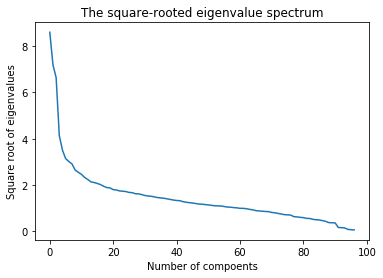

In [2]:
#====================================================#
# YOUR CODE HERE: 
#   Perform PCA and plot the square-rooted eigenvalue spectrum
#====================================================#

Xplan_0_mean = (Xplan - np.mean(Xplan, axis=0)).T

S = 1.0 / Xplan_0_mean.shape[1] * np.matmul(Xplan_0_mean, Xplan_0_mean.T)

evals, pcs = np.linalg.eig(S)

sqrt_evals = np.sqrt(evals)

desc_idx = np.argsort(evals)[::-1]

plt.plot(sqrt_evals[desc_idx])

plt.xlabel('Number of compoents')
plt.ylabel('Square root of eigenvalues')
plt.title('The square-rooted eigenvalue spectrum')

print(np.sum(evals[desc_idx][0:3]) / np.sum(evals))
#====================================================#
# END YOUR CODE 
#====================================================#


Answer:  
The top 3 principal components contribute 44.8% of overal variance.


### (b) (10 points)
For the purposes of visualization, we'll consider the PC space defined by the top $D=3$ eigenvectors.
Project the data into the three-dimensional PC space.
Plot the projected points in Python using the imported `Axes3D`(You can also google other methods to plot in 3D), and color each dot appropriately according to reaching angle (there should be a total of 728 dots).
Choose a 3D view in which the clusters are well-separated.   

(The first $91$ rows correspond to data from reach direction $1$, the next $91$ rows correspond to data from reach direction $2$, and so forth.)

Hint: The way we do the 3D plot is to first call: 

`fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')`

After doing a scatter plot of the points by calling `ax.scatter`, we find a good projection by calling `ax.view_init(elev=15, azim=60)`


(97, 97)
(97, 3)
(3, 728)


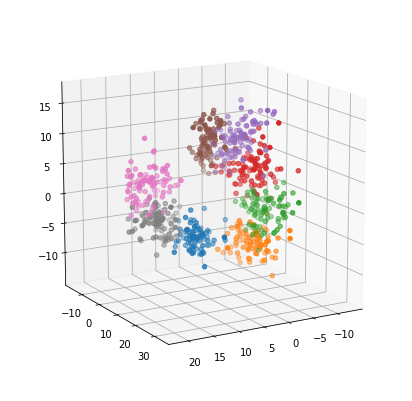

In [33]:
#====================================================#
# YOUR CODE HERE: 
#   Plot reach data projected into three-dimensional PC space
#====================================================#
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
U3 = pcs[:, desc_idx][:,0:3]
print(pcs.shape)
print(U3.shape)

sk = np.matmul(U3.T, Xplan_0_mean)
print(sk.shape)

for i in range(int(728/91)):
    ax.scatter(sk[0, i*91:(i+1) * 91], sk[1, i*91:(i+1) * 91], sk[2, i*91:(i+1) * 91])
ax.view_init(elev=15, azim=60)
#====================================================#
# END YOUR CODE 
#====================================================#

### (c) (10 points) 
Define a matrix $U_D\in\mathbf{R}^{N\times D}$ containing the top three eigenvectors (i.e., PC directions), where $U_D(n,d)$ indicates the contribution of the `n` th neuron to the `d` th principal component.  Show the values in $U_D$ by calling `imshow`. (Note: Also call `colorbar` to show the scale.)  Are there are any obvious groupings among the neurons in each column of $U_D$?



Text(0,0.5,'Principal components')

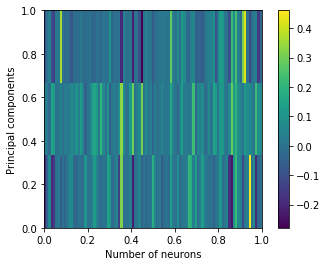

In [41]:
#====================================================#
# YOUR CODE HERE: 
#   Plot Matrix U_D of top three principal component directions using imshow
#====================================================#

img = plt.imshow(U3.T, extent=[0,1,0,1])
plt.colorbar(img)
plt.xlabel('Number of neurons')
plt.ylabel('Principal components')
#====================================================#
# END YOUR CODE 
#====================================================#

Answer:
